In [1]:
import subprocess

# Suppress output of pip install command
subprocess.run(['pip', 'install', 'pandas', 'numpy', 'scikit-learn'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

CompletedProcess(args=['pip', 'install', 'pandas', 'numpy', 'scikit-learn'], returncode=0)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Example features


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


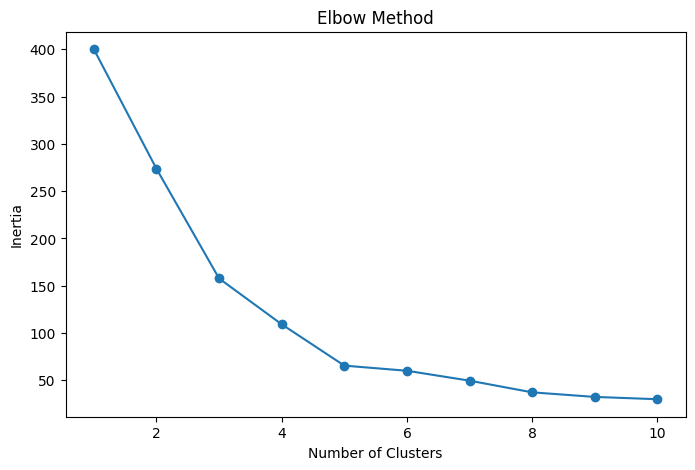

In [7]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters


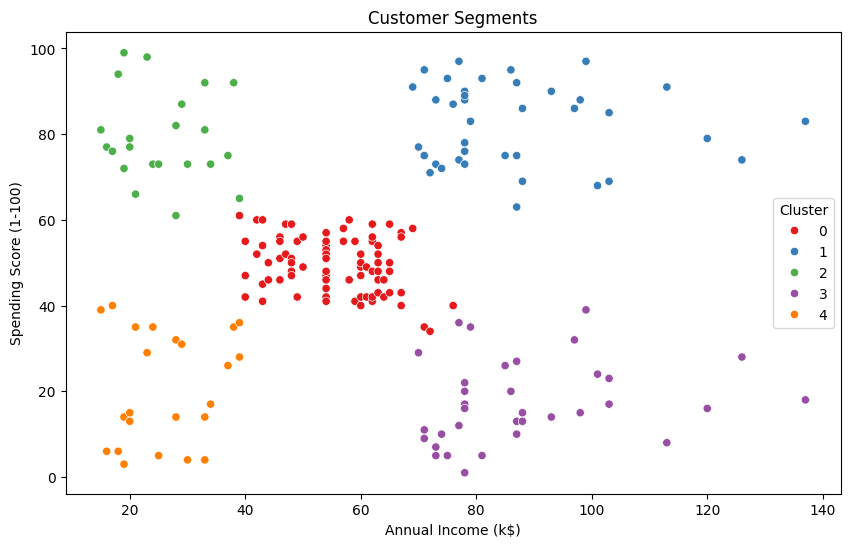

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.show()


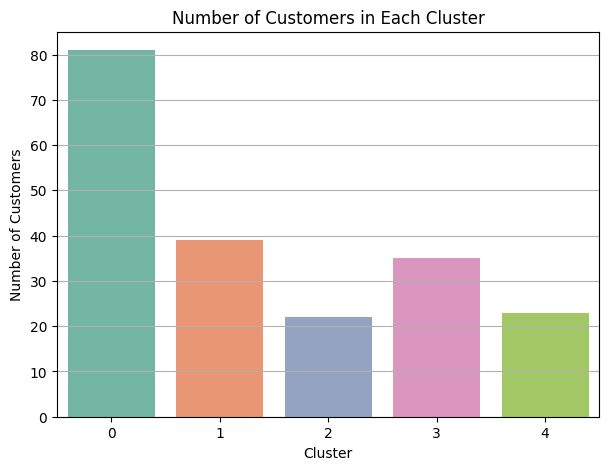

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x='Cluster', hue='Cluster', data=df, palette='Set2', legend=False)
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y')
plt.show()


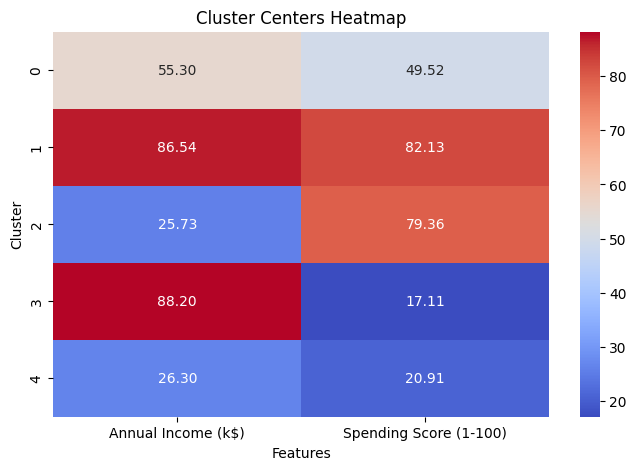

In [11]:
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=['Annual Income (k$)', 'Spending Score (1-100)']
)

plt.figure(figsize=(8,5))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Centers Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()